# MatplotLib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [9]:
#parametros opcionais para globalizar
params = {
    'ytick.color': 'black',
    'xtick.color': 'black',
    'axes.labelcolor': 'black',
    'axes.edgecolor': 'black'
}
plt.rcParams.update(params)

## Método pyplot

In [5]:
x = ['1T', '2T', '3T', '4T']
y = [2000, 2200, 1100, 3505]

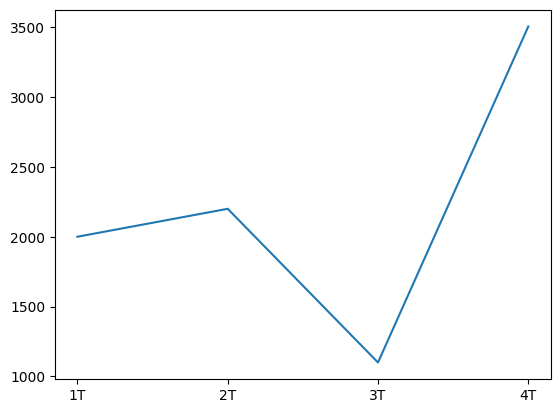

In [10]:
plt.plot(x, y)

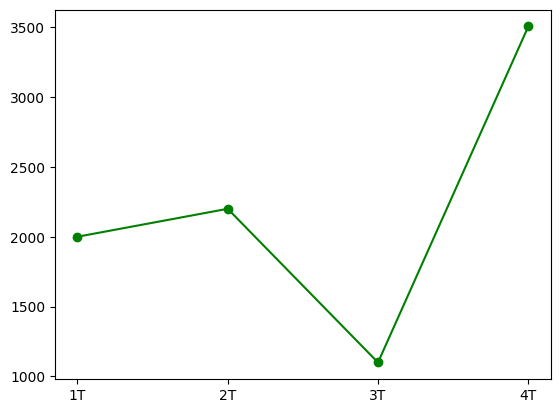

In [18]:
#passando argumentos
plt.plot(x, y, color='green', marker='o')

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

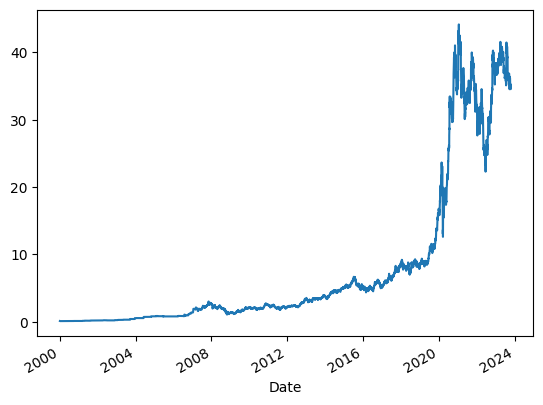

In [19]:
#pandas + pyplot
cotacoes = yf.download('WEGE3.SA')['Adj Close']
cotacoes.plot()

[*********************100%%**********************]  4 of 4 completed
            LREN3.SA  PETR4.SA  VALE3.SA  WEGE3.SA
Date                                              
2017-11-22 -0.021981  0.013208  0.020264  0.014242
2017-11-23 -0.031720  0.018239  0.033774  0.005611
2017-11-24 -0.037284  0.012579  0.051101 -0.007337
2017-11-27 -0.044797 -0.001887  0.039941 -0.011653
2017-11-28 -0.026989 -0.003774  0.064611 -0.016401
...              ...       ...       ...       ...
2023-10-09 -0.556082  5.199313  1.975936  3.265659
2023-10-10 -0.544879  5.245431  1.993868  3.320739
2023-10-11 -0.541378  5.229467  2.019871  3.304827
2023-10-13 -0.555732  5.435224  1.985350  3.227715
2023-10-16 -0.546279  5.506175  2.017181  3.241179

[1465 rows x 4 columns]


<Axes: xlabel='Date'>

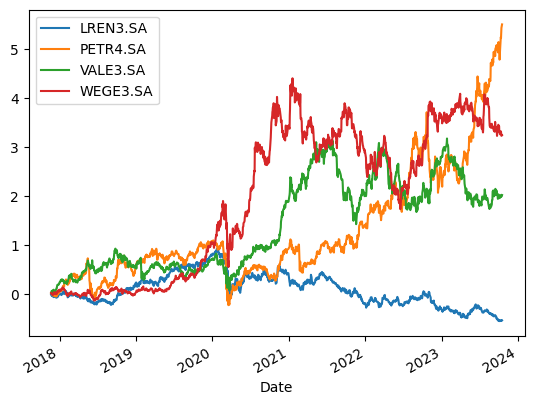

In [25]:
df = yf.download(['WEGE3.SA', 'PETR4.SA', 'VALE3.SA', 'LREN3.SA'], '2017-11-21')['Adj Close']

# performance acululada no periodo
df = ((df.pct_change().dropna()) + 1).cumprod() -1

print(df)
df.plot()

Axes(0.125,0.11;0.775x0.77)


<Axes: xlabel='dias'>

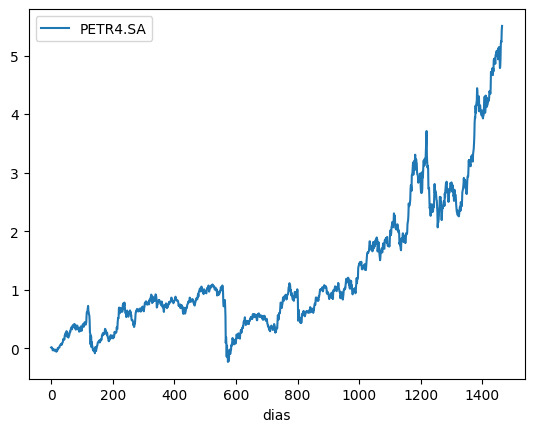

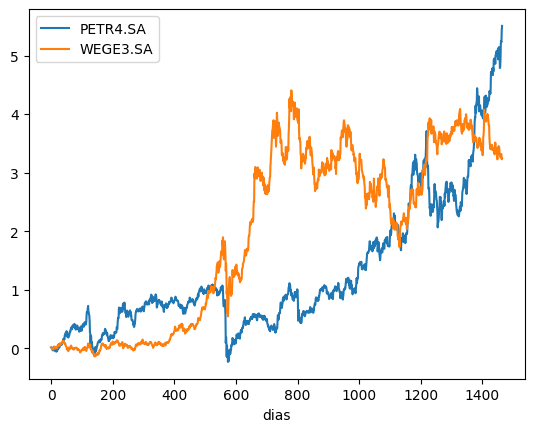

In [28]:
#mudando a legenda e valores do eixo X
#legenda = Nome da coluna do df
#valores = valores da coluna
df_mudando_coluna = df.copy()

df_mudando_coluna['dias'] = list(range(0, len(df)))
#especificando o y
print(df_mudando_coluna.plot(x = 'dias', y = 'PETR4.SA'))
#passando uma lista
df_mudando_coluna.plot(x = 'dias', y = ['PETR4.SA', 'WEGE3.SA'])


## Outros tipos de graficos
- barra
- pizza
- histograma
- area
- dispersão

LREN3.SA   -0.546279
PETR4.SA    5.506175
VALE3.SA    2.017181
WEGE3.SA    3.241179
Name: 2023-10-16 00:00:00, dtype: float64


<Axes: >

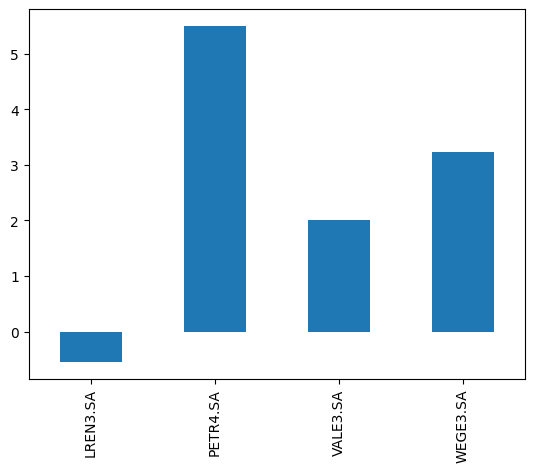

In [30]:
#grafico de barra com a performance acumulada das ações
print(df.iloc[-1]) #ultimo dado (acumulado)
df.iloc[-1].plot(kind = 'bar')

### Gráfico de barra empilhado com a performance acumulada das açoes ano a ano
Essa é uma ótima forma de visualizar como os dados evoluíram ao logo do tempo. Qual % do total eles repesentavam antes e atualmente. É muito utilizado para comercio internacional


      LREN3.SA  PETR4.SA  VALE3.SA  WEGE3.SA
Date                                        
2017 -0.010501  0.012579  0.195009  0.043092
2018  0.196845  0.488037  0.575123  0.004089
2019  0.777275  1.045885  0.689778  1.015226
2020  0.401931  0.921295  1.888335  3.439185
2021 -0.195014  1.372996  2.029077  2.910382
2022 -0.306105  2.496776  2.784841  3.647510
2023 -0.546279  5.506175  2.017181  3.241179


<Axes: xlabel='Date'>

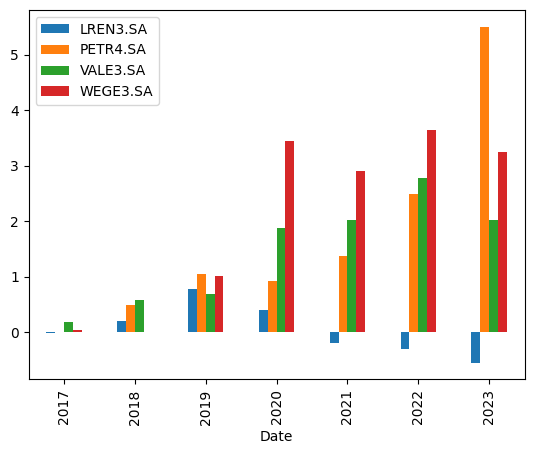

In [37]:
df_anual = df.resample('Y').last() #resample retorna apenas o ultimo dado daquele periodo
df_anual.index = df_anual.index.year

print(df_anual)
df_anual.plot.bar(stacked = False)

<Axes: ylabel='Date'>

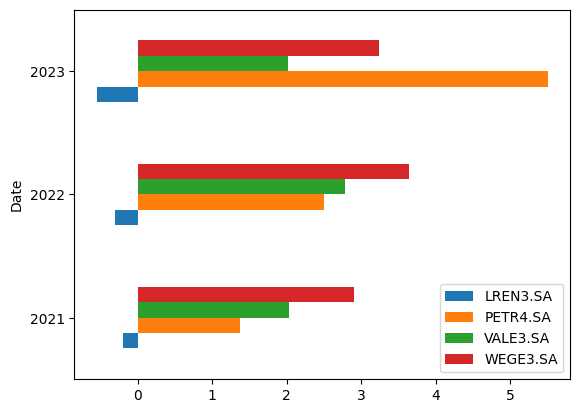

In [40]:
#grafico de barras na horizontal
#selecionando a quantidade de anos
df_anual[-3:].plot.barh()

### Gráfico de área


In [44]:
preco_original = yf.download(['WEGE3.SA', 'PETR4.SA', 'VALE3.SA', 'LREN3.SA'], '2017-11-21')['Adj Close']
qtd_acoes = yf.download(['WEGE3.SA', 'PETR4.SA', 'VALE3.SA', 'LREN3.SA'], '2017-11-21')['Volume']

volume = qtd_acoes * preco_original

volume = volume.replace(0, pd.NA)
volume = volume.dropna().resample('M').mean()

volume
#media mensal do valor em reais de acoes negociadas

[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  4 of 4 completed


,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,
2017-11-30,91924802.416017,192094737.197328,508865936.789775,41200699.830906
2017-12-31,79704547.143915,185962628.685863,436022342.257429,39934389.013515
2018-01-31,74970716.02052,289547915.696803,428627175.388999,41618767.245277
2018-02-28,108298838.232375,374642762.987142,633986125.090472,49664093.163698
2018-03-31,91373736.136045,357001291.75725,510759828.077017,35926153.795151
...,...,...,...,...
2023-06-30,478805667.814482,1962166958.100746,2034034299.631864,287655951.409186
2023-07-31,447027830.925723,1328602912.557675,1725743194.850068,392154258.830407
2023-08-31,370324903.688091,1624864825.164306,1781117877.408235,236947592.13504


<Axes: xlabel='Date'>

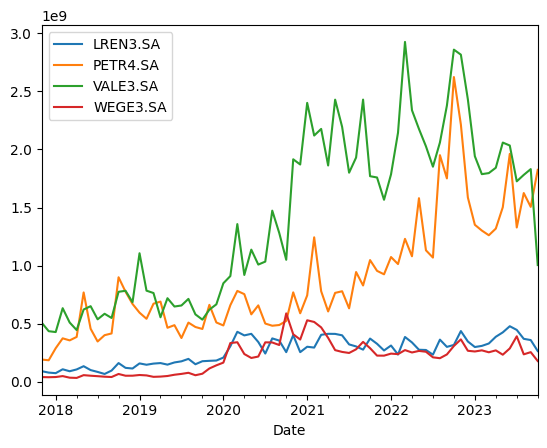

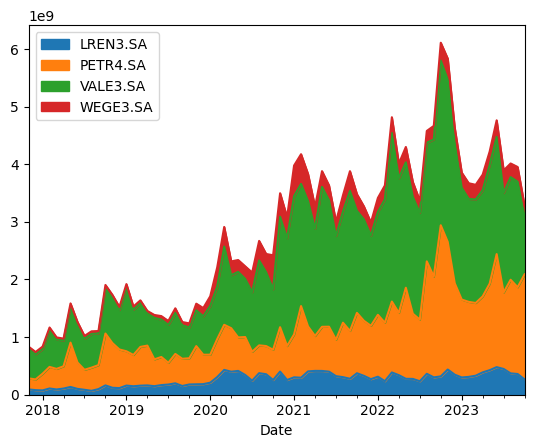

In [47]:
volume.plot()
#x
volume.plot.area()

In [50]:
## Histograma de retornos diários
# quantidade de x que os valores se repetem
cotacoes = yf.download('ASAI3.SA')['Adj Close']
retornos_diarios = cotacoes.pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed


Date
2021-03-02    0.015406
2021-03-03   -0.016552
2021-03-04    0.026648
2021-03-05    0.024590
2021-03-08   -0.053200
                ...   
2023-10-09   -0.016170
2023-10-10    0.047578
2023-10-11    0.004955
2023-10-13   -0.045193
2023-10-16    0.012909
Name: Adj Close, Length: 657, dtype: float64
Axes(0.125,0.11;0.775x0.77)


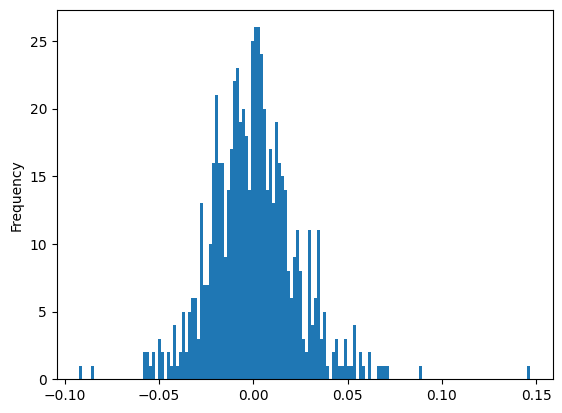

In [56]:
print(retornos_diarios)
print(retornos_diarios.plot.hist(bins=150))

# Boxsplot
<center>
<img src="boxsplot.jpg" width = 300>


[*********************100%%**********************]  4 of 4 completed


<Axes: >

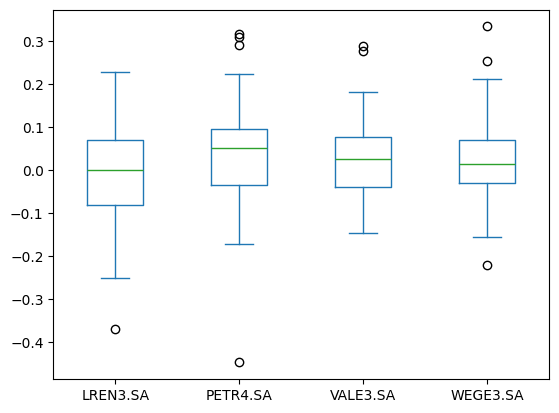

In [57]:
cotacoes = yf.download(['WEGE3.SA', 'PETR4.SA', 'VALE3.SA', 'LREN3.SA'], '2017-11-21')['Adj Close']

retornos_mensais = cotacoes.resample('M').last().pct_change().dropna()
retornos_mensais.plot.box()

## Grafico de dispersão
- Retornos ibov x Dolar em cada ano

In [61]:
cotacoes = yf.download(['^BVSP', 'BRL=X'])['Close']

cotacoes = cotacoes.resample('Y').last().pct_change().dropna()

cotacoes['ano'] = cotacoes.index.year
cotacoes['ano'] = cotacoes['ano'].astype('category')

print(cotacoes.tail(4))

cotacoes.columns = ['Dolar', 'Ibovespa', 'Ano']

cotacoes.tail(4)

[*********************100%%**********************]  2 of 2 completed
               BRL=X     ^BVSP   ano
Date                                
2020-12-31  0.292633  0.028819  2020
2021-12-31  0.073083 -0.121402  2021
2022-12-31 -0.051273  0.049694  2022
2023-12-31 -0.046550  0.059100  2023


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_10556\4252629188.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  cotacoes = cotacoes.resample('Y').last().pct_change().dropna()


,Dolar,Ibovespa,Ano
Date,,,
2020-12-31,0.292633,0.028819,2020
2021-12-31,0.073083,-0.121402,2021
2022-12-31,-0.051273,0.049694,2022
2023-12-31,-0.046550,0.059100,2023


<Axes: xlabel='Dolar', ylabel='Ibovespa'>

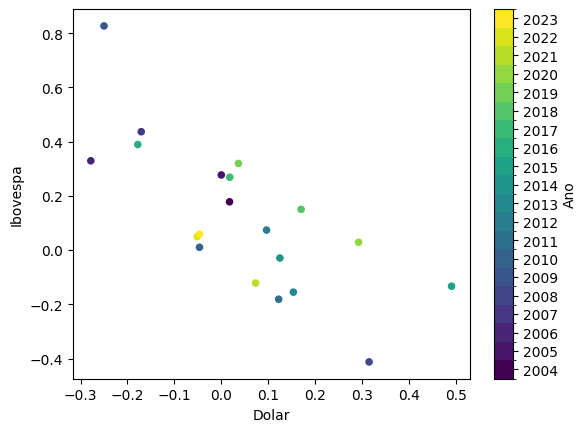

In [62]:
cotacoes.plot.scatter(x = 'Dolar', y = 'Ibovespa', c = 'Ano', cmap = 'viridis')